In [22]:
%matplotlib notebook

In [23]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matminer.featurizers.structure import XRDPowderPattern
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
df = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\pkl_files\structure_df_hfo2.pkl')
df

,structure,name
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif
...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif


In [25]:
xrd = XRDPowderPattern(two_theta_range=(5, 70))
df = xrd.fit_featurize_dataframe(df, 'structure')
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_56,xrd_57,xrd_58,xrd_59,xrd_60,xrd_61,xrd_62,xrd_63,xrd_64,xrd_65
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif,1.439513e-84,2.678647e-72,5.009460e-61,9.415472e-51,1.778562e-41,3.376537e-33,6.442432e-26,1.235389e-19,...,0.018606,0.014534,0.020144,0.020324,0.011524,0.009744,1.619879e-02,5.322862e-03,2.002654e-04,8.042242e-07
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif,1.979444e-82,2.130610e-70,2.369415e-59,2.722420e-49,3.231810e-40,3.963812e-32,5.022930e-25,6.576243e-19,...,0.023508,0.016446,0.024325,0.010041,0.004452,0.008244,4.895351e-03,2.772459e-03,7.303301e-03,8.367327e-03
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif,2.158208e-87,8.889230e-75,3.474467e-63,1.288740e-52,4.536239e-43,1.515234e-34,4.803045e-27,1.444797e-20,...,0.054099,0.045276,0.014642,0.020540,0.004934,0.001966,4.311752e-03,6.296555e-03,6.586910e-03,8.909189e-04
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif,0.000000e+00,0.000000e+00,1.549846e-299,8.738347e-275,4.163561e-251,1.676469e-228,5.704547e-207,1.640370e-186,...,0.087121,0.039722,0.011652,0.020429,0.007324,0.000330,1.414293e-06,5.239129e-10,1.647743e-14,4.383394e-20
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif,2.994610e-10,3.314232e-07,3.708263e-05,4.194725e-04,4.797130e-04,5.546317e-05,6.482956e-07,7.661019e-10,...,0.018816,0.016911,0.020426,0.021258,0.009094,0.010132,1.572829e-02,4.400530e-03,1.662102e-04,8.664220e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif,0.000000e+00,0.000000e+00,4.906216e-313,4.143742e-287,2.621691e-262,1.242547e-238,4.411510e-216,1.173287e-194,...,0.075542,0.011501,0.017954,0.020969,0.001847,0.000012,6.024526e-09,2.230771e-13,6.187707e-19,1.285723e-25
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif,3.075577e-86,1.266606e-73,4.813424e-62,1.687968e-51,5.462250e-42,1.631085e-33,4.494477e-26,1.142823e-19,...,0.019030,0.014928,0.008548,0.016886,0.014611,0.009670,1.016322e-02,4.155236e-03,1.310673e-03,2.254586e-03
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif,2.631083e-11,5.007709e-08,9.594163e-06,1.850285e-04,3.591978e-04,7.019274e-05,1.380747e-06,2.734008e-09,...,0.023312,0.015407,0.012213,0.007067,0.006410,0.006659,3.577698e-03,6.012753e-03,9.359086e-03,1.026937e-02
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif,8.738772e-12,3.712684e-08,1.219558e-05,3.097373e-04,6.082212e-04,9.234352e-05,1.083997e-06,9.838448e-10,...,0.045660,0.015743,0.015829,0.013472,0.002556,0.001747,7.456134e-04,1.688910e-03,1.763748e-03,2.160524e-04


In [26]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true

0             m
1             o
2           p-o
3             t
4             m
         ...   
1720          t
1721          m
1722          o
1723    unknown
1724          t
Name: labels_0_4, Length: 1725, dtype: object

In [27]:
# labels_true = labels_true['new_labels']
# labels_true = labels_true.values
# labels_true = labels_true.astype(int)

In [28]:
labels_true = labels_true.replace({'m': 0, 'p-o': 1, 'o': 2, 't': 3, 'unknown': 4})
labels_true

0       0
1       2
2       1
3       3
4       0
       ..
1720    3
1721    0
1722    2
1723    4
1724    3
Name: labels_0_4, Length: 1725, dtype: int64

In [29]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,xrd_8,xrd_9,...,xrd_56,xrd_57,xrd_58,xrd_59,xrd_60,xrd_61,xrd_62,xrd_63,xrd_64,xrd_65
0,1.439513e-84,2.678647e-72,5.009460e-61,9.415472e-51,1.778562e-41,3.376537e-33,6.442432e-26,1.235389e-19,2.380858e-14,4.611465e-10,...,0.018606,0.014534,0.020144,0.020324,0.011524,0.009744,1.619879e-02,5.322862e-03,2.002654e-04,8.042242e-07
1,1.979444e-82,2.130610e-70,2.369415e-59,2.722420e-49,3.231810e-40,3.963812e-32,5.022930e-25,6.576243e-19,8.895601e-14,1.243224e-09,...,0.023508,0.016446,0.024325,0.010041,0.004452,0.008244,4.895351e-03,2.772459e-03,7.303301e-03,8.367327e-03
2,2.158208e-87,8.889230e-75,3.474467e-63,1.288740e-52,4.536239e-43,1.515234e-34,4.803045e-27,1.444797e-20,4.124301e-15,1.117242e-10,...,0.054099,0.045276,0.014642,0.020540,0.004934,0.001966,4.311752e-03,6.296555e-03,6.586910e-03,8.909189e-04
3,0.000000e+00,0.000000e+00,1.549846e-299,8.738347e-275,4.163561e-251,1.676469e-228,5.704547e-207,1.640370e-186,3.986185e-167,8.185940e-149,...,0.087121,0.039722,0.011652,0.020429,0.007324,0.000330,1.414293e-06,5.239129e-10,1.647743e-14,4.383394e-20
4,2.994610e-10,3.314232e-07,3.708263e-05,4.194725e-04,4.797130e-04,5.546317e-05,6.482956e-07,7.661019e-10,1.266057e-13,6.203183e-10,...,0.018816,0.016911,0.020426,0.021258,0.009094,0.010132,1.572829e-02,4.400530e-03,1.662102e-04,8.664220e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.000000e+00,0.000000e+00,4.906216e-313,4.143742e-287,2.621691e-262,1.242547e-238,4.411510e-216,1.173287e-194,2.337567e-174,3.488724e-155,...,0.075542,0.011501,0.017954,0.020969,0.001847,0.000012,6.024526e-09,2.230771e-13,6.187707e-19,1.285723e-25
1721,3.075577e-86,1.266606e-73,4.813424e-62,1.687968e-51,5.462250e-42,1.631085e-33,4.494477e-26,1.142823e-19,2.681493e-14,5.805928e-10,...,0.019030,0.014928,0.008548,0.016886,0.014611,0.009670,1.016322e-02,4.155236e-03,1.310673e-03,2.254586e-03
1722,2.631083e-11,5.007709e-08,9.594163e-06,1.850285e-04,3.591978e-04,7.019274e-05,1.380747e-06,2.734008e-09,6.767186e-13,1.730227e-09,...,0.023312,0.015407,0.012213,0.007067,0.006410,0.006659,3.577698e-03,6.012753e-03,9.359086e-03,1.026937e-02
1723,8.738772e-12,3.712684e-08,1.219558e-05,3.097373e-04,6.082212e-04,9.234352e-05,1.083997e-06,9.838448e-10,7.193198e-14,9.906244e-11,...,0.045660,0.015743,0.015829,0.013472,0.002556,0.001747,7.456134e-04,1.688910e-03,1.763748e-03,2.160524e-04


In [30]:
# PCA description will go down
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[4.80517225e-77, 1.88133046e-67, 6.03974752e-58, ...,
        4.78168160e-01, 1.56287322e-02, 7.46539045e-05],
       [6.60749068e-75, 1.49642000e-65, 2.85672876e-56, ...,
        2.49058048e-01, 5.69950416e-01, 7.76715775e-01],
       [7.20421414e-80, 6.24329361e-70, 4.18905453e-60, ...,
        5.65637866e-01, 5.14043203e-01, 8.27015340e-02],
       ...,
       [8.78269466e-04, 3.51713215e-03, 1.15673788e-02, ...,
        5.40143087e-01, 7.30384091e-01, 9.53277344e-01],
       [2.91704860e-04, 2.60757975e-03, 1.47038214e-02, ...,
        1.51719672e-01, 1.37643106e-01, 2.00555457e-02],
       [3.24257609e-04, 2.78412410e-03, 1.52341215e-02, ...,
        4.64669424e-02, 3.72534058e-03, 3.19426969e-05]])

In [31]:
mPCA = PCA(n_components=50)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
variance_ratio

array([44.8, 66.9, 74.9, 80.6, 84.6, 87.4, 90. , 91.4, 92.4, 93.2, 93.9,
       94.5, 95. , 95.5, 95.9, 96.3, 96.6, 96.9, 97.2, 97.4, 97.6, 97.8,
       98. , 98.2, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2,
       99.3, 99.4, 99.5, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6])

<IPython.core.display.Javascript object>


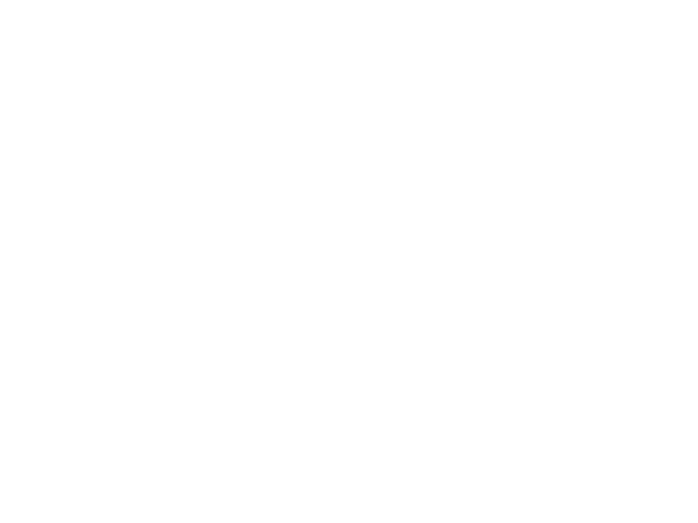

In [32]:
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [33]:
pca = PCA(n_components=3)
PCA = pca.fit_transform(X)

In [34]:
dfPCA = pd.DataFrame(PCA)
dfPCA['labels'] = labels_true
dfPCA.columns = ['x1','x2','x3', 'labels']
dfPCA

,x1,x2,x3,labels
0,1.438088,-0.692170,-0.297487,0
1,0.156142,1.460025,-0.299488,2
2,-0.881917,-0.067861,-0.158854,1
3,-1.509966,-0.642348,-0.168229,3
4,1.348969,-0.680531,-0.220119,0
...,...,...,...,...
1720,-1.466559,-0.517541,-0.316503,3
1721,1.519789,-0.646958,-0.274914,0
1722,0.421622,1.491016,-0.343763,2
1723,-1.048995,-0.223852,-0.350506,4


In [35]:
dendo = dfPCA[['x1', 'x2']]

<IPython.core.display.Javascript object>


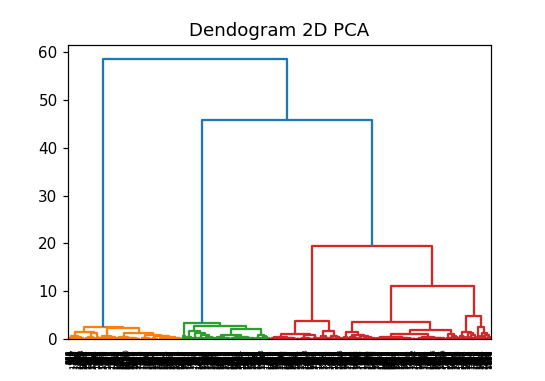

In [36]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(5, 3.5))
plt.title("Dendogram 2D PCA")
dend = shc.dendrogram(shc.linkage(dendo, method='ward'))

In [37]:
from sklearn.cluster import AgglomerativeClustering
dendo = dfPCA[['x1', 'x2', 'x3']]
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
pre_labels = cluster.fit_predict(dendo)
dfPCA['cluster'] = pre_labels

<IPython.core.display.Javascript object>


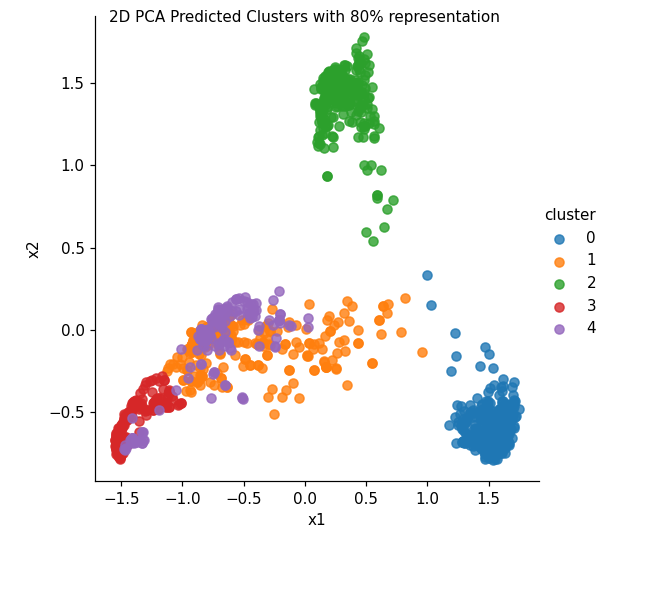

Text(0.5, 0.98, '2D PCA Predicted Clusters with 80% representation')

In [38]:
dfPCA2 = dfPCA[['x1', 'x2', 'cluster']]
lm = sns.lmplot(data=dfPCA2, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Predicted Clusters with 80% representation", fontsize=10)

<IPython.core.display.Javascript object>


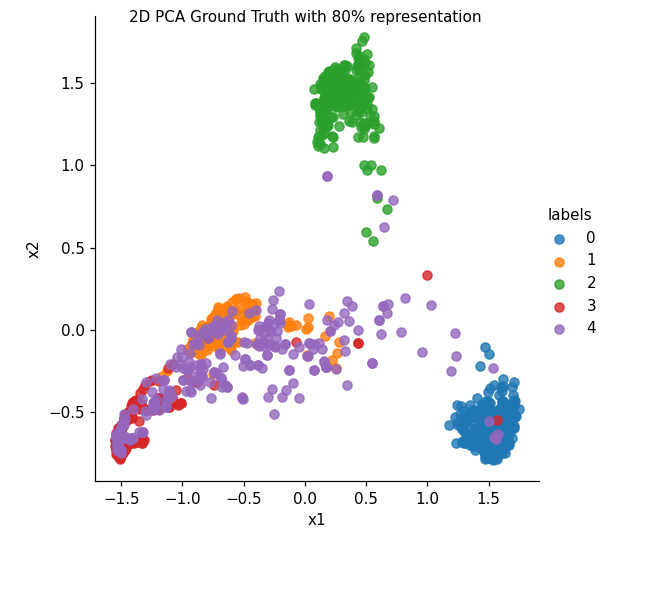

Text(0.5, 0.98, '2D PCA Ground Truth with 80% representation')

In [39]:
dfPCA2_true = dfPCA[['x1', 'x2', 'labels']]
lm = sns.lmplot(data=dfPCA2_true, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Ground Truth with 80% representation", fontsize=10)

In [40]:
dfPCA['labels'] = dfPCA['labels'].replace({0: 'm', 1:'p-o', 2:'o', 3: 't', 4: 'unknown'})
dfPCA

,x1,x2,x3,labels,cluster
0,1.438088,-0.692170,-0.297487,m,0
1,0.156142,1.460025,-0.299488,o,2
2,-0.881917,-0.067861,-0.158854,p-o,1
3,-1.509966,-0.642348,-0.168229,t,3
4,1.348969,-0.680531,-0.220119,m,0
...,...,...,...,...,...
1720,-1.466559,-0.517541,-0.316503,t,3
1721,1.519789,-0.646958,-0.274914,m,0
1722,0.421622,1.491016,-0.343763,o,2
1723,-1.048995,-0.223852,-0.350506,unknown,1


In [41]:
import plotly.express as px
fig = px.scatter_3d(
    dfPCA, x='x1', y='x2', z='x3', color=dfPCA['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()

In [42]:
fig = px.scatter_3d(
    dfPCA, x='x1', y='x2', z='x3', color=dfPCA['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction'
)
fig.show()